<a href="https://colab.research.google.com/github/thangarajan8/100-Days-Of-ML-Code/blob/master/glda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [ ]:
len(set(newsgroups_test.target))
print(newsgroups_train.filenames.shape, newsgroups_train.target.shape)

(11314,) (11314,)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [ ]:
np.random.seed(400)
import nltk
nltk.download('wordnet')
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense
print(WordNetLemmatizer().lemmatize('going', pos = 'v')) # present tense to present tense
print(WordNetLemmatizer().lemmatize('gone', pos = 'v')) # past tense to present tense
print(WordNetLemmatizer().lemmatize('goes', pos = 'v')) # present tense to present tense
print(WordNetLemmatizer().lemmatize('go', pos = 'v')) # present tense to present tense

import pandas as pd

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
go
go
go
go
go


In [ ]:
stemmer = SnowballStemmer("english")
original_words = ["Today", "I", "will", "be", "giving", "a", "talk", "in", "the", "fifth", "elephant", "2019", "conference"]
singles = [stemmer.stem(plural) for plural in original_words]

y = pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

In [ ]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
def stemming_and_lemmatizing(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(stemming_and_lemmatizing(token))
            
    return result

In [ ]:
'''
Preview a document after preprocessing
'''
document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocessing(doc_sample))

Original document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced.']


Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'like', 'replac']


In [ ]:
docs = []

for doc in newsgroups_train.data:
    docs.append(preprocessing(doc))

In [ ]:
'''
Preview 'docs' to see what all words are being captured
'''
print(docs[:2])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

In [ ]:
'''
capturing all the different words present in 'docs'
'''
all_word_corpus = []
for doc in docs:
    all_word_corpus += doc

In [ ]:
doc_lengths = pd.Series([len(sent) for sent in docs])

In [ ]:
doc_lengths.describe(percentiles=[x/10 for x in range(11)])

count    11314.000000
mean       126.783896
std        234.665599
min          9.000000
0%           9.000000
10%         37.000000
20%         48.000000
30%         58.000000
40%         69.000000
50%         81.000000
60%         94.000000
70%        114.000000
80%        144.000000
90%        213.000000
100%      5494.000000
max       5494.000000
dtype: float64

In [ ]:
doc_lengths.describe(percentiles=[x/100 for x in range(0,10)])

count    11314.000000
mean       126.783896
std        234.665599
min          9.000000
0%           9.000000
1%          20.000000
2%          23.000000
3%          27.000000
4%          28.000000
5%          30.000000
6%          32.000000
7%          33.000000
8%          34.000000
9%          36.000000
50%         81.000000
max       5494.000000
dtype: float64

In [ ]:
doc_lengths.describe(percentiles=[x/100 for x in range(90,100)])


count    11314.000000
mean       126.783896
std        234.665599
min          9.000000
50%         81.000000
90%        213.000000
91%        224.000000
92%        241.000000
93%        262.090000
94%        288.000000
95%        319.000000
96%        367.000000
97%        426.610000
98%        558.220000
99%        885.000000
max       5494.000000
dtype: float64

In [ ]:
# chosing upper_bound = 300 and lower_bound = 30
chosen_docs = []
for doc in docs:
    if len(doc) > 30 and len(doc) < 300:
        chosen_docs.append(doc)

In [ ]:
print(len(docs), len(chosen_docs))

11314 10063


In [ ]:
docs = chosen_docs


In [ ]:
'''
capturing all the different words present in 'docs'
'''
all_word_corpus = []
for doc in docs:
    all_word_corpus += doc

In [ ]:
from collections import Counter
word_frequency_dict = Counter(all_word_corpus)

In [ ]:
word2id = {}
id2word = {}
vocab = []
currentWordId = 0

In [ ]:
for word, count in Counter(all_word_corpus).most_common():
    word2id[word] = currentWordId
    id2word[currentWordId] = word
    currentWordId += 1
    vocab.append(word)

In [ ]:
len(docs), len(word2id), len(id2word)

(10063, 42185, 42185)

In [ ]:
final_docs = []

for doc in docs:
    currentDoc = []
    for word in doc: 
        if word in word2id:
            currentDoc.append(word2id[word])
    final_docs.append(currentDoc)

In [ ]:
docs = final_docs

In [ ]:
X = np.zeros((len(docs), len(word2id)),dtype=int)

In [ ]:
X.shape

(10063, 42185)

In [ ]:
for idx, doc in enumerate(docs):
    for idy in doc:
        X[idx,idy] += 1

In [ ]:
# pip install guidedlda
from guidedlda import GuidedLDA as lda

     |████████████████████████████████| 2.1MB 3.9MB/s 
  Created wheel for guidedlda: filename=guidedlda-2.0.0.dev22-cp36-cp36m-linux_x86_64.whl size=2479772 sha256=ff4272f3f916aba7019704791276df74883b94ad1b6ea95e7d322918d89774e6
  Stored in directory: /root/.cache/pip/wheels/cf/cb/c4/95897cbe4e2e12bd01db3c5cb004c744d2cfd68ecc692ce39e
Successfully built guidedlda


In [ ]:
model = lda(n_topics= 10, n_iter=1000, random_state=1, refresh=50)
model.fit(X)

topic_word = model.topic_word_
n_top_words = 25
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
    print("\n")
    print('Topic {} : {}'.format(i, ', '.join(topic_words)))

INFO:guidedlda:n_documents: 10063
INFO:guidedlda:vocab_size: 42185
INFO:guidedlda:n_words: 959761
INFO:guidedlda:n_topics: 10
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -11209661
INFO:guidedlda:<50> log likelihood: -8363745
INFO:guidedlda:<100> log likelihood: -8212734
INFO:guidedlda:<150> log likelihood: -8152296
INFO:guidedlda:<200> log likelihood: -8123989
INFO:guidedlda:<250> log likelihood: -8107704
INFO:guidedlda:<300> log likelihood: -8097444
INFO:guidedlda:<350> log likelihood: -8092519
INFO:guidedlda:<400> log likelihood: -8087836
INFO:guidedlda:<450> log likelihood: -8084354
INFO:guidedlda:<500> log likelihood: -8081570
INFO:guidedlda:<550> log likelihood: -8077471
INFO:guidedlda:<600> log likelihood: -8074195
INFO:guidedlda:<650> log likelihood: -8072860
INFO:guidedlda:<700> log likelihood: -8070212
INFO:guidedlda:<750> log likelihood: -8069174
INFO:guidedlda:<800> log likelihood: -8068229
INFO:guidedlda:<850> log likelihood: -8066937
INFO:guidedlda:<900>



Topic 0 : write, subject, christian, line, organ, peopl, think, know, believ, articl, say, jesus, post, like, moral, univers, thing, mean, come, time, exist, bibl, question, word, religion


Topic 1 : line, window, subject, organ, write, post, problem, drive, file, univers, host, card, know, nntp, work, thank, like, articl, need, program, help, scsi, disk, driver, repli


Topic 2 : line, subject, organ, articl, write, post, food, nntp, nasa, cramer, host, optilink, buffalo, know, univers, homosexu, harvard, studi, peopl, clayton, virginia, world, steve, dyer, event


Topic 3 : line, subject, organ, post, space, nasa, write, host, univers, nntp, articl, sale, mail, like, distribut, access, year, work, know, interest, includ, sell, offer, toronto, henri


Topic 4 : israel, isra, write, subject, articl, organ, line, armenian, arab, jew, peopl, post, turkish, say, state, think, kill, univers, american, polici, world, jewish, right, govern, armenia


Topic 5 : chip, line, encrypt, clipper

In [ ]:
top_words = list(reversed(model.word_topic_.T[1].argsort()))

In [ ]:
for word in top_words[0:300]:
    print(vocab[word], word_frequency_dict[vocab[word]])

scsi 730
printer 362
simm 334
font 327
floppi 260
motherboard 244
quadra 209
xterm 182
centri 143
bio 140
icon 131
vram 121
eisa 117
vesa 113
colormap 112
desktop 111
nubus 100
cursor 98
menu 97
svga 88
dresden 86
meg 85
powerbook 82
ethernet 82
app 81
xpert 77
sparc 77
cview 74
deskjet 72
toolkit 70
download 70
lciii 70
bitmap 69
cica 66
xview 63
openwindow 63
iisi 63
config 62
sharewar 62
dram 59
adaptec 56
speedstar 56
esdi 55
ctrl 55
chipset 54
borland 54
quicktim 52
enterpoop 51
hade 51
truetyp 50
reboot 49
midi 49
maxtor 48
uart 48
coprocessor 47
xputimag 45
bubblejet 45
grayscal 44
workspac 43
powerpc 41
solari 40
zeo 40
seagat 39
harddisk 39
benchmark 38
rainer 38
gerard 38
winbench 38
msdos 37
fractal 37
raster 36
fujitsu 35
dcoleman 35
winmark 34
cdrom 34
olwm 34
irzr 34
louray 34
desonia 33
syquest 33
mcmaster 33
tvtwm 33
menus 32
laptop 32
diablo 32
megabyt 31
nanao 31
init 31
asynchron 30
bmug 30
jpeg 30
slee 30
laserwrit 30
andre_beck 30
autoexec 29
eniac 29
upload 29
sun

IndexError: ignored

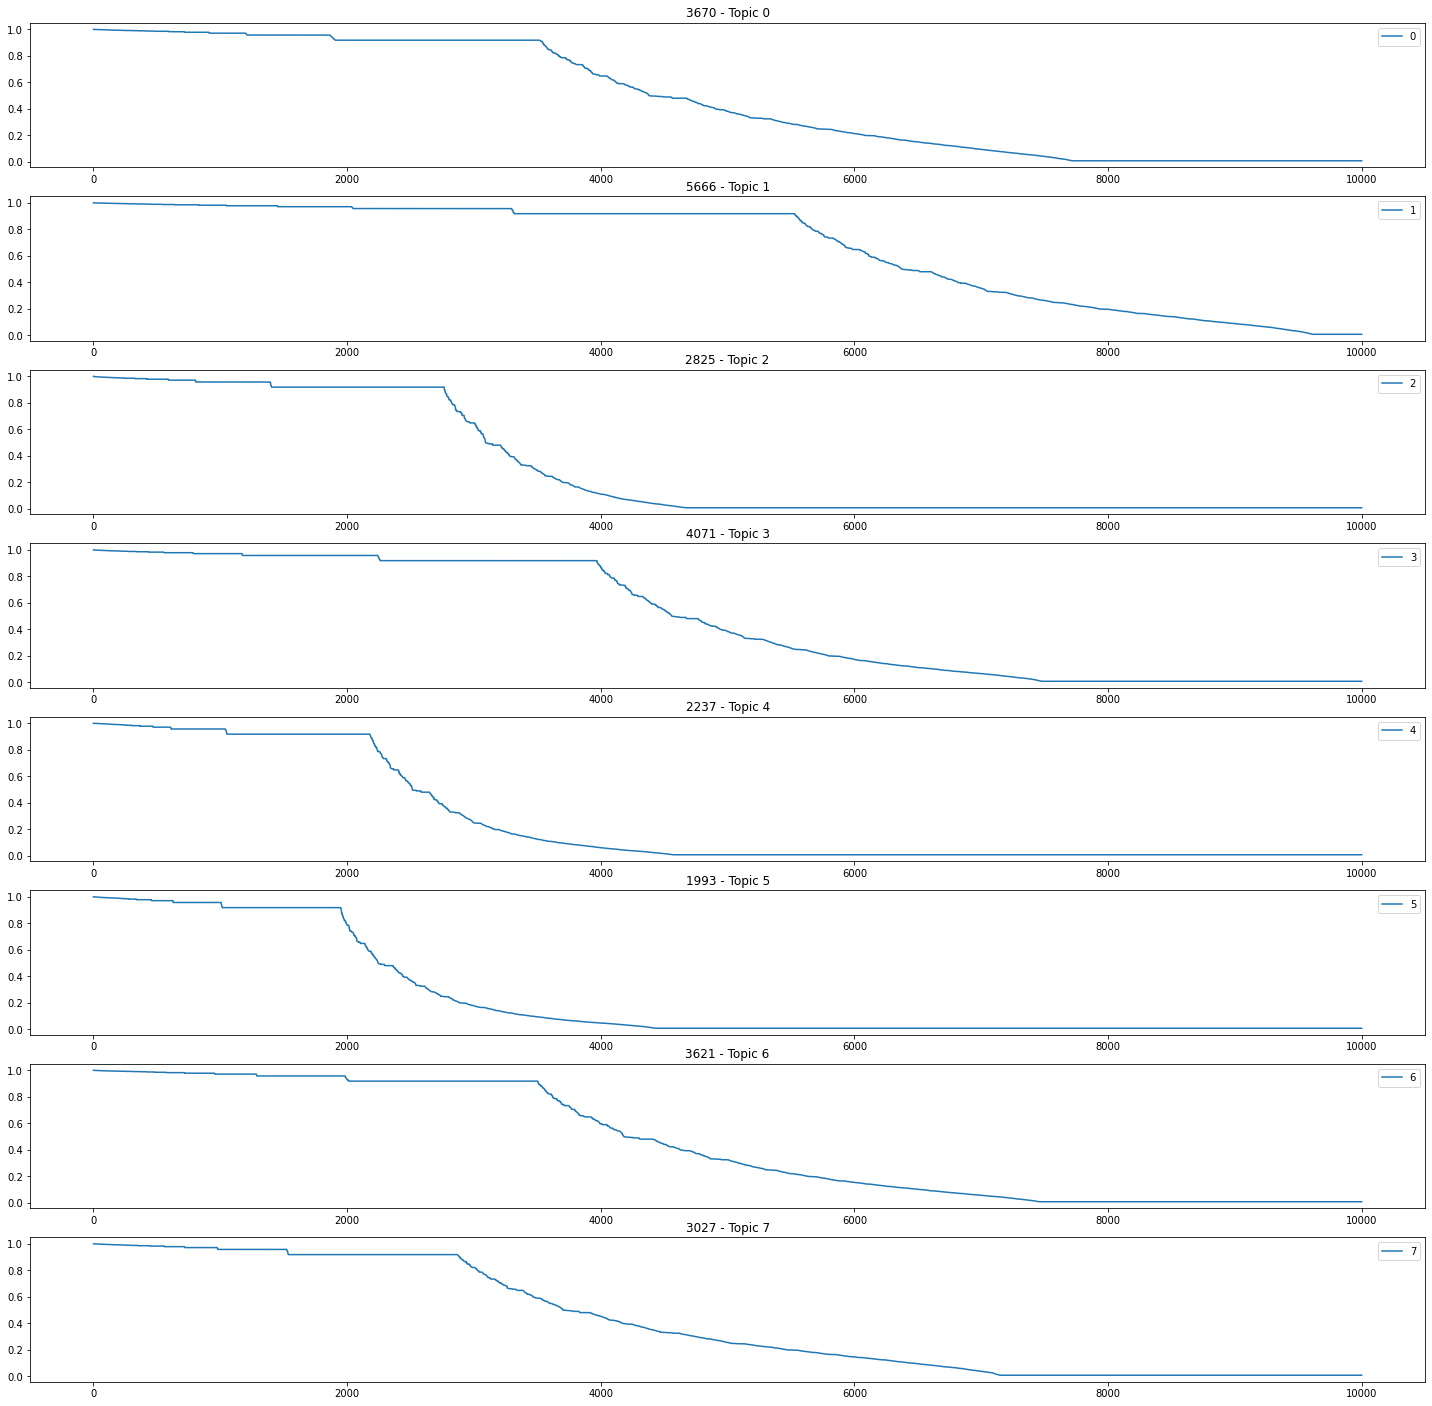

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
n_topics = 8

f, axs = plt.subplots(n_topics, figsize=(25,25))
for topic_id, topic_dist in enumerate(model.word_topic_.T):
    topic_score = sorted(topic_dist, reverse=True)
    count_score = len(list(filter(lambda val: val > 0.8, topic_score)))
    ax = axs[topic_id]
    ax.plot(topic_score[0:10000])
    ax.set_title(str(count_score) + ' - ' + f'Topic {topic_id}')
    ax.legend([str(topic_id)], loc='upper right')
#str(len(set(topic_id_to_coverage[topic_id]))))

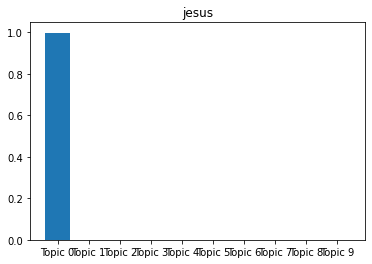

In [ ]:
for key, value in word2id.items():
    if key =='jesus':
        plt.bar([i for i in range(len(model.word_topic_[0]))],model.word_topic_[value])
        plt.rcParams["figure.figsize"] = [15,6]
        plt.xticks([i for i in range(len(model.word_topic_[0]))],[f'Topic {i}' for i in range(len(model.word_topic_[0]))])
        plt.title(key)

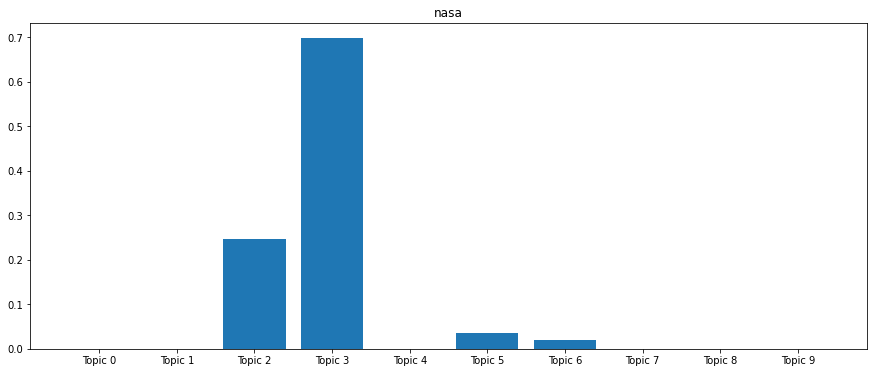

In [ ]:
for key, value in word2id.items():
    if key =='nasa':
        plt.bar([i for i in range(len(model.word_topic_[0]))],model.word_topic_[value])
        plt.rcParams["figure.figsize"] = [15,6]
        plt.xticks([i for i in range(len(model.word_topic_[0]))],[f'Topic {i}' for i in range(len(model.word_topic_[0]))])
        plt.title(key)

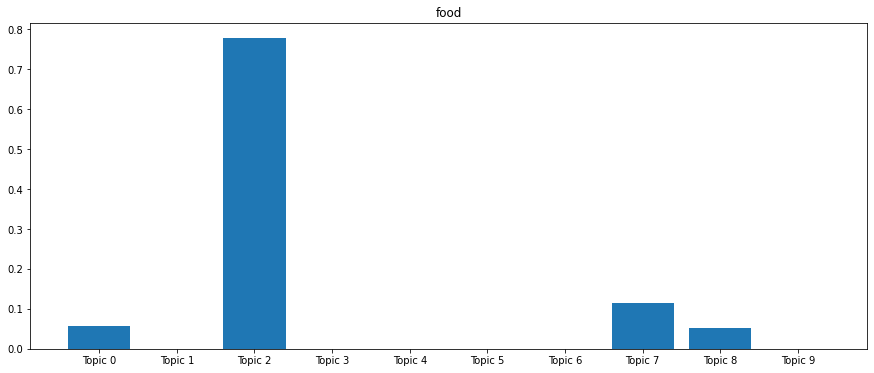

In [ ]:
for key, value in word2id.items():
    if key =='food':
        plt.bar([i for i in range(len(model.word_topic_[0]))],model.word_topic_[value])
        plt.rcParams["figure.figsize"] = [15,6]
        plt.xticks([i for i in range(len(model.word_topic_[0]))],[f'Topic {i}' for i in range(len(model.word_topic_[0]))])
        plt.title(key)

In [ ]:
seed_dict = {'Graphics Cards' : 0, 'Space' : 1, 'Religion' : 2 , 'Politics' : 3, 'Gun Violence' : 4,
             'Technology' : 5, 'Sports' : 6, 'Encryption' : 7 }

In [ ]:
seed_topics = {}

In [ ]:
seed_topics.update({
    word2id["drive"] : seed_dict["Graphics Cards"], word2id["sale"] : seed_dict["Graphics Cards"], 
    word2id["driver"] : seed_dict["Graphics Cards"], word2id["wire"] : seed_dict["Graphics Cards"], 
    word2id["card"] : seed_dict["Graphics Cards"], word2id["graphic"] : seed_dict["Graphics Cards"], 
    word2id["price"] : seed_dict["Graphics Cards"], word2id["appl"] : seed_dict["Graphics Cards"],
    word2id["softwar"] : seed_dict["Graphics Cards"], word2id["monitor"] : seed_dict["Graphics Cards"]
})

In [ ]:
# Topic 2: Possibly Space
seed_topics.update({
    word2id["space"] : seed_dict["Space"], word2id["nasa"] : seed_dict["Space"], 
    word2id["drive"] : seed_dict["Space"], word2id["scsi"] : seed_dict["Space"], 
    word2id["orbit"] : seed_dict["Space"], word2id["launch"] : seed_dict["Space"],
    word2id["data"] : seed_dict["Space"], word2id["control"] : seed_dict["Space"], 
    word2id["earth"] : seed_dict["Space"],word2id["moon"] : seed_dict["Space"]
})

In [ ]:
# Topic 6: Possibly Sports
seed_topics.update({
    word2id["game"] : seed_dict["Sports"], word2id["team"] : seed_dict["Sports"], 
    word2id["play"] : seed_dict["Sports"], word2id["player"] : seed_dict["Sports"], 
    word2id["hockey"] : seed_dict["Sports"], word2id["season"] : seed_dict["Sports"], 
    word2id["pitt"] : seed_dict["Sports"], word2id["score"] : seed_dict["Sports"], 
    word2id["leagu"] : seed_dict["Sports"], word2id["pittsburgh"] : seed_dict["Sports"]
})

In [ ]:
# Topic 4: Possibly Politics
seed_topics.update({
    word2id["armenian"] : seed_dict["Politics"], word2id["public"] : seed_dict["Politics"], 
    word2id["govern"] : seed_dict["Politics"], word2id["turkish"] : seed_dict["Politics"], 
    word2id["columbia"] : seed_dict["Politics"], word2id["nation"] : seed_dict["Politics"], 
    word2id["presid"] : seed_dict["Politics"], word2id["turk"] : seed_dict["Politics"], 
    word2id["american"] : seed_dict["Politics"], word2id["group"] : seed_dict["Politics"]
})

In [ ]:
# Topic 5: Possibly Gun Violence
seed_topics.update({
    word2id["kill"] : seed_dict["Gun Violence"], word2id["bike"] : seed_dict["Gun Violence"], 
    word2id["live"] : seed_dict["Gun Violence"], word2id["leav"] : seed_dict["Gun Violence"], 
    word2id["weapon"] : seed_dict["Gun Violence"], word2id["happen"] : seed_dict["Gun Violence"], 
    word2id["gun"] : seed_dict["Gun Violence"], word2id["crime"] : seed_dict["Gun Violence"],
    word2id["car"] : seed_dict["Gun Violence"], word2id["hand"] : seed_dict["Gun Violence"]
})

In [ ]:
model = lda(n_topics= 8, n_iter=1000, random_state=1, refresh=50)
model.fit(X, seed_topics = seed_topics, seed_confidence = 0.3)
topic_word = model.topic_word_
n_top_words = 25
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
    print('\n')
    print('Topic {} : {}'.format(i, ', '.join(topic_words)))

INFO:guidedlda:n_documents: 10063
INFO:guidedlda:vocab_size: 42185
INFO:guidedlda:n_words: 959761
INFO:guidedlda:n_topics: 8
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -10856990
INFO:guidedlda:<50> log likelihood: -8296052
INFO:guidedlda:<100> log likelihood: -8193131
INFO:guidedlda:<150> log likelihood: -8151373
INFO:guidedlda:<200> log likelihood: -8130919
INFO:guidedlda:<250> log likelihood: -8118629
INFO:guidedlda:<300> log likelihood: -8112180
INFO:guidedlda:<350> log likelihood: -8106177
INFO:guidedlda:<400> log likelihood: -8104167
INFO:guidedlda:<450> log likelihood: -8102096
INFO:guidedlda:<500> log likelihood: -8099537
INFO:guidedlda:<550> log likelihood: -8095926
INFO:guidedlda:<600> log likelihood: -8096258
INFO:guidedlda:<650> log likelihood: -8094382
INFO:guidedlda:<700> log likelihood: -8092926
INFO:guidedlda:<750> log likelihood: -8091390
INFO:guidedlda:<800> log likelihood: -8091317
INFO:guidedlda:<850> log likelihood: -8089718
INFO:guidedlda:<900> 



Topic 0 : line, subject, organ, window, post, univers, write, drive, host, nntp, problem, card, file, know, thank, work, like, articl, need, help, scsi, disk, program, mail, distribut


Topic 1 : line, subject, organ, nasa, write, space, articl, post, like, nntp, host, univers, work, know, power, need, time, look, distribut, access, year, think, toronto, thing, high


Topic 2 : line, subject, organ, write, window, chip, post, encrypt, clipper, host, nntp, articl, like, know, secur, key, phone, need, code, work, mail, repli, program, motif, inform


Topic 3 : write, peopl, subject, organ, articl, line, govern, right, state, israel, think, post, isra, say, univers, like, clinton, armenian, american, jew, kill, arab, know, nation, time


Topic 4 : line, subject, write, organ, articl, like, post, think, host, nntp, bike, know, good, univers, go, time, peopl, right, thing, look, distribut, drive, state, want, engin


Topic 5 : organ, articl, line, subject, write, know, post, like, pitt, u

In [ ]:

num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)



In [ ]:
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

NameError: ignored

In [ ]:
print(newsgroups_test.target[num])